In [1]:
import tensorflow as tf

Kemudian kita buat objek untuk menampung dataset kita dan masukkan fungsi tf.keras.datasets.<nama_dataset> pada objek tersebut. Karena pada kasus ini menggunakan dataset mnist, kode yang digunakan sebagai berikut.

In [2]:
mnist = tf.keras.datasets.mnist

Selanjutnya, kita perlu membagi dataset yang sudah ada menjadi dua bagian yaitu pelatihan dan uji menggunakan fungsi load_data(). Fungsi load_data() dari objek dataset mengembalikan bentuk dataset yang telah dibagi menjadi atribut latih, label latih, atribut uji, dan label uji. Sangat gampang, bukan? Hanya dengan beberapa baris kode kita sudah memiliki data latih dan data uji yang siap dipakai.

In [3]:
(gambar_latih, label_latih), (gambar_testing, label_testing) = mnist.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 731c5ac602752760c8e48fbffcf8c3b850d9dc2a2aedcf2cc48468fc17b673d1 so we will re-download the data.
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 88s 8us/step


Kita bisa menampilkan label dan salah satu gambar dari data latih menggunakan library matplotlib untuk memastikan data yang kita pilih sudah sesuai dan siap pakai.

5


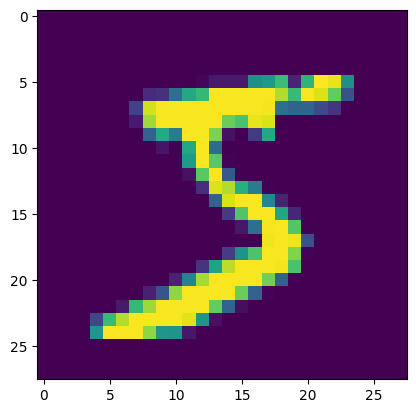

In [4]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(gambar_latih[0])
print(label_latih[0])

Namun, dataset yang kita miliki belum dinormalisasi sehingga kita harus melakukannya secara manual. Kode di bawah berfungsi untuk membagi setiap piksel pada gambar sebesar 255 karena nilai sebuah piksel berkisar dari 0 sampai 255. 

In [5]:
gambar_latih  = gambar_latih / 255.0
gambar_testing = gambar_testing / 255.0

Untuk melakukan hal tersebut tentu sangatlah mudah jika menggunakan TensorFlow, kita hanya perlu memanggil layer Flatten dan mengisi parameter seperti biasanya.

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

C:\Users\HP-01\python_env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Terakhir, tentukan optimizer dan loss untuk model, lalu lakukan pelatihan pada model.

In [7]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(gambar_latih, label_latih, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8797 - loss: 0.4304
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9628 - loss: 0.1245
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9746 - loss: 0.0835
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9826 - loss: 0.0581
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9860 - loss: 0.0464


Sekarang, cobalah berlatih menggunakan dataset lain yang disediakan oleh TensorFlow Datasets. Kira-kira, apa yang berbeda? Bagaimana cara menggunakannya? Mari kita melangkah ke materi berikutnya untuk mendapatkan jawabannya.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

Setelah berhasil menginstal library TFDS, kita dapat melihat list atau daftar dari dataset yang tersedia pada TFDS. Untuk melihat seluruh dataset yang tersedia, kita bisa menggunakan fungsi tfds.list_builders() atau dapat dilihat pada katalog https://www.tensorflow.org/datasets/catalog/overview.

In [9]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'ai2dcaption',
 'aloha_mobile',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bridge_data_msr',
 'bucc',
 'c4',
 'c4_ws

Seperti yang Anda lihat pada gambar di atas, ada banyak sekali dataset yang tersedia ketika kita menggunakan TFDS, baik itu untuk pembelajaran maupun eksplorasi mandiri. Setelah melihat banyak sekali dataset, tentunya kita harus menentukan dataset mana yang akan digunakan, bukan? Tenang saja, caranya sangat mudah. Kita hanya perlu menggunakan fungsi tfds.load() seperti berikut.

In [13]:
ds = tfds.load('mnist', split='train', shuffle_files=True)
assert isinstance(ds, tf.data.Dataset)

##### Kode di atas memuat dataset MNIST menggunakan TensorFlow Datasets. Mari kita jelaskan satu per satu detail dari kode di atas. #####

Fungsi load() memungkinkan Anda untuk menggunakan dataset yang telah disediakan oleh TensorFlow Datasets. 
Parameter pertama ('mnist') menunjukkan nama dataset yang ingin dimuat. 
Parameter kedua ('split='train'') menunjukkan bahwa kita hanya memuat bagian pelatihan dari dataset MNIST. 
Parameter ketiga ('shuffle_files=True') mengindikasikan bahwa file-file dataset akan diacak sebelum dimuat, sehingga urutan data tidak akan tetap sama setiap kali dataset dimuat ulang. 
Pada hakikatnya masih ada argumen umum yang sering digunakan ketika melakukan load dataset menggunakan tfds. Untuk mengetahui lebih detail, Anda dapat melihat pada website resminya TensorFlow Loads, ya.

Pada baris kedua mungkin ada sebuah sintaksis yang cukup asing bagi kita, yaitu assert isinstance. Wah, apa tuh bang? Fungsi tersebut adalah sebuah pernyataan asersi (assertion statement) yang memeriksa apakah variabel ds adalah sebuah objek tf.data.Dataset. Assertion ini berguna untuk memastikan bahwa data yang dimuat benar-benar dalam bentuk dataset TensorFlow yang dapat digunakan untuk melatih model.

Masih ingat dengan ketentuan membagi data latih dan data uji? Yup, dengan menjalankan kode di atas, kita belum membagi dataset menjadi proporsi yang dibutuhkan. Untuk melakukan itu menggunakan TFDS, kita dapat melakukannya dengan kode berikut.

In [14]:
(train_images, train_labels), (test_images, test_labels) = tfds.as_numpy(tfds.load('mnist',
              split = ['train', 'test'],
              batch_size=-1,
              as_supervised=True))

Selanjutnya, kita akan menggunakan berbagai macam layer sebagai arsitektur model ini. Untuk layer pertama, kita menggunakan layer khusus yaitu Conv2D() yang digunakan untuk mengekstraksi fitur dari gambar input menggunakan operasi konvolusi. Dilanjutkan oleh MaxPooling2D yang berguna untuk mereduksi dimensi spasial dari representasi gambar berdasarkan layer sebelumnya.

Setelah trial and error mengenai layer Convo2D dan MaxPooling2D, barulah kita menggunakan Flatten yang berfungsi untuk mengubah input kita yang berupa matriks 2 dimensi menjadi array 1 dimensi.

Hufttt, terlihat sangat rumit, ya? Sebenarnya tidak serumit yang Anda bayangkan kok. Dengan menggunakan TensorFlow, kita hanya perlu membangun arsitektur seperti pada latihan-latihan sebelumnya. Mari kita telisik kode di bawah ini.

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

Seperti yang Anda lihat di atas, kita menggunakan beberapa layer Conv2D dan MaxPooling2D. Hal ini sangat berfungsi untuk melakukan perhitungan konvolusi yang lebih detail terhadap data pelatihan yang kita miliki. Hal yang harus diperhatikan ada pada layer pertama, yaitu input_shape. Yup, kita harus menyesuaikan ukuran gambar yang ada pada dataset dengan model yang kita bangun.

Selanjutnya, kita juga harus menggunakan layer Flatten seperti yang sudah kita bahas berkali-kali sebelumnya. Terakhir, pastikan units yang ditetapkan sesuai dengan jumlah kelas yang ada pada kasus Anda. Karena kasus ini merupakan multi kelas dengan 10 kelas, units yang dibutuhkan adalah 10 dengan activation softmax.

Sebelum melakukan pelatihan, kita harus menentukan tiga buah argumen untuk melakukan compile model yang telah dibangun. Tentunya Anda masih ingatkan terhadap optimizers, loss function, dan metrics? Benar, kita harus menentukan konfigurasi yang tepat untuk kasus yang dihadapi.

In [16]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'],
)

Setelah model.compile() dipanggil, model sudah siap untuk dilatih dengan memanggil fungsi model.fit() dengan data pelatihan yang sesuai.

In [ ]:
model.fit(train_images , train_labels, batch_size=50, epochs=5)

Epoch 1/5
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8327 - loss: 1.2200
Epoch 2/5
 207/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9755 - loss: 0.0768